# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.3.0 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

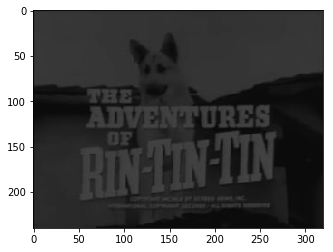

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

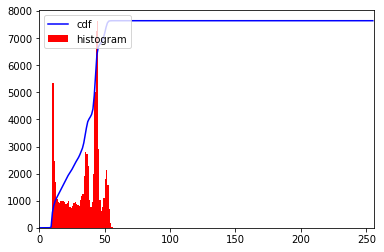

In [14]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

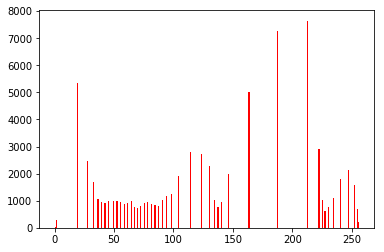

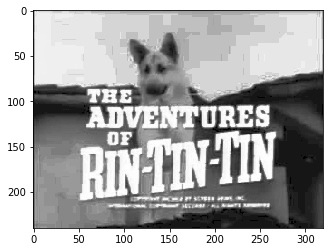

In [17]:
resposta = cv2.equalizeHist(rintin_gray)
plt.hist(resposta.flatten(),256,[0,256], color = 'r')
plt.show()

#imagem
plt.imshow(resposta, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


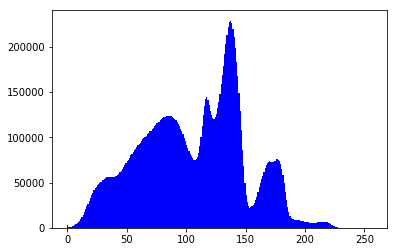

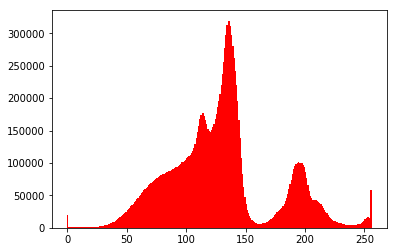

In [77]:
boxes = cv2.imread("hall_box_battery1.jpg")
b,g,r = cv2.split(boxes)
plt.hist(b.flatten(),256,[0,256], color = 'b')
plt.show()
plt.hist(r.flatten(),256,[0,256], color = 'r')
plt.show()

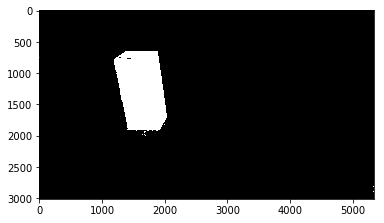

In [78]:
boxes_hsv = cv2.cvtColor(boxes, cv2.COLOR_BGR2HSV)
lower_red = np.array([0,50,50])
upper_red = np.array([7,255,255])
mask = cv2.inRange(boxes_hsv, lower_red, upper_red)
plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)